# Ames Housing Prediction ML Project

#### Kaggle Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Import Necessary Packages

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import pickle

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from pprint import pprint
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

## Eploratory Data Analysis (EDA) on the Data
- Look at Overall Data
- Analyze Categorical Variable Distributions
- Deeper Dive into the Important Features
- Remove Outliers
- Check for Null Values

### Look at Overall Data

In [62]:
# Reaed the database in & have all of the data show in display.
train = pd.read_csv('train.csv')
pd.set_option('display.max_rows', 500, 'display.max_columns', 500)

In [63]:
# Top 5 rows of the data.
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [64]:
# Numerical value distributions.
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [65]:
# Taking out ID for now since it won't be needed for modeling.
train.drop('Id', axis = 1, inplace = True)

In [66]:
# Check the dimensions of the database. 81 columns x 1460 rows, but one column is ID and there is the target feature (SalePrice).
# Both will not be used for modeling purposes.
train.shape

(1460, 80)

In [67]:
# Check for number of unique values for each features.
# Categorical features are in line with the data dictionary and there are many unique values for numerical as expected. 
train.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [68]:
# Data type & non-null counts for each columns. There are a few variables that have many null values.
train.info()

'''
Notes:
- Variables that stand out are Alley, FireplaceQu, PoolQC, Fence, and MiscFeature.
- They will be dealt by either imputation or feature selection later.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

'\nNotes:\n- Variables that stand out are Alley, FireplaceQu, PoolQC, Fence, and MiscFeature.\n- They will be dealt by either imputation or feature selection later.\n'

### Analyze Categorical Variable Distributions

In [69]:
# Get all column names with data type object
objcol = list(train.columns[train.dtypes == 'object'])

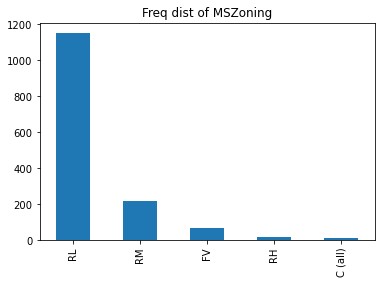

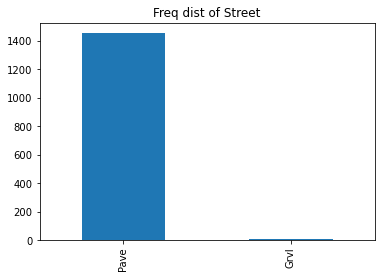

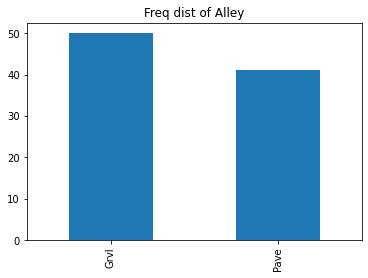

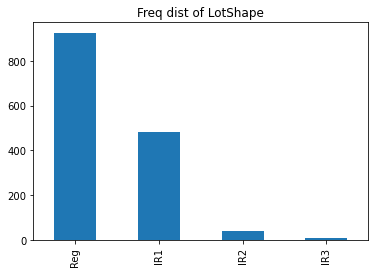

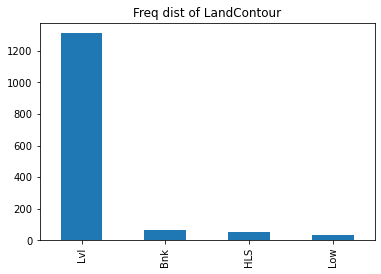

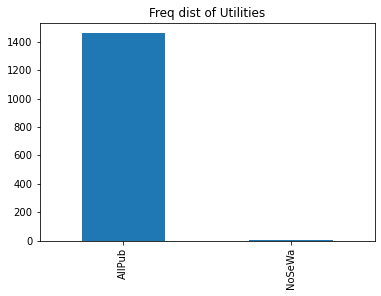

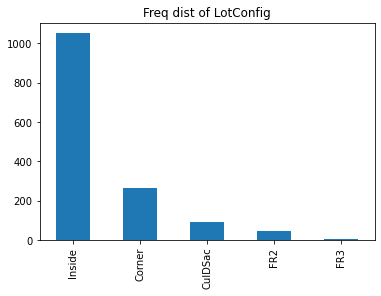

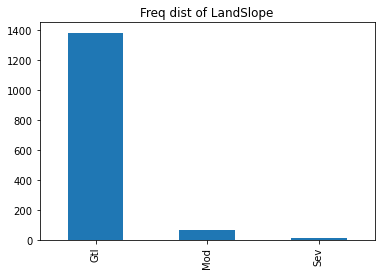

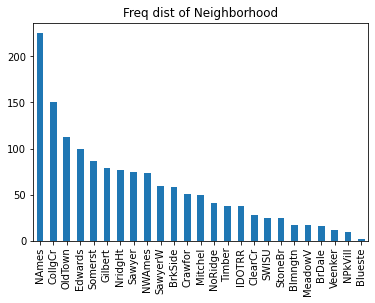

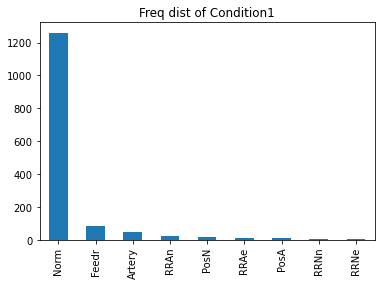

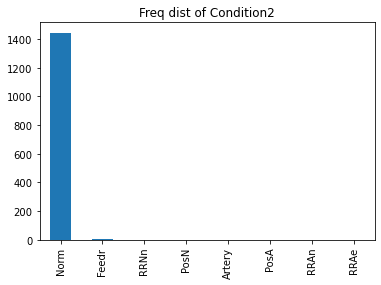

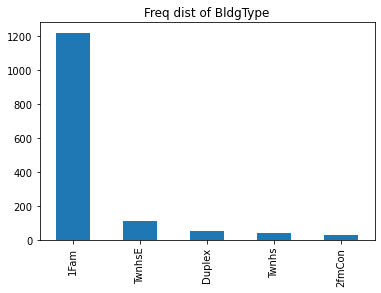

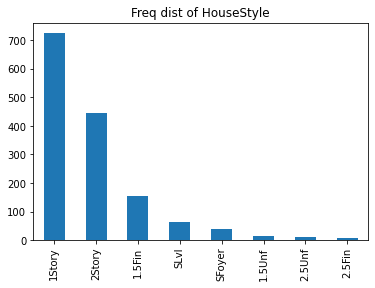

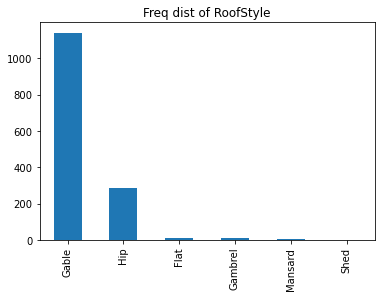

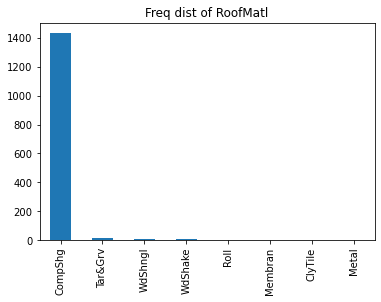

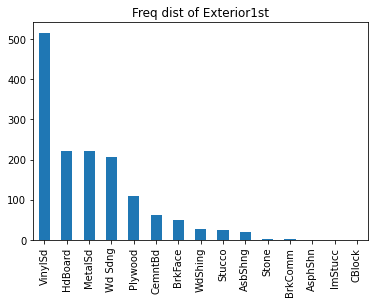

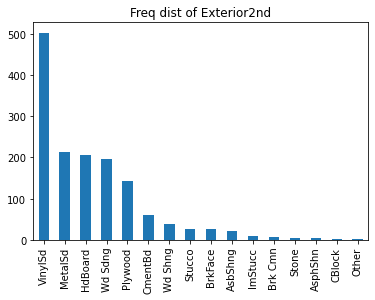

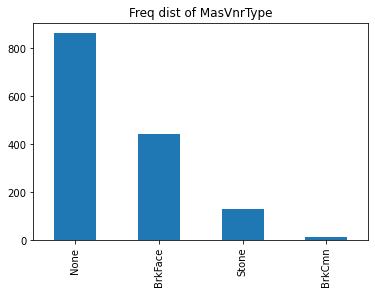

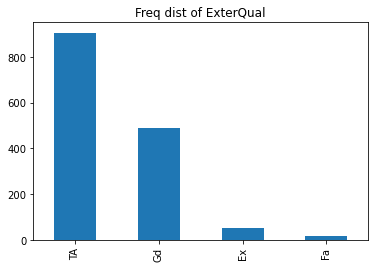

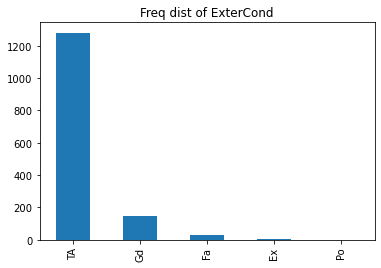

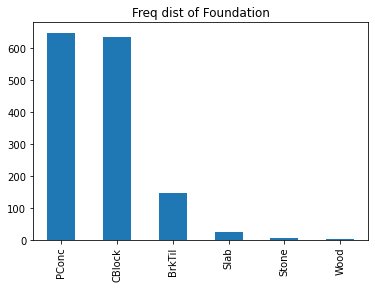

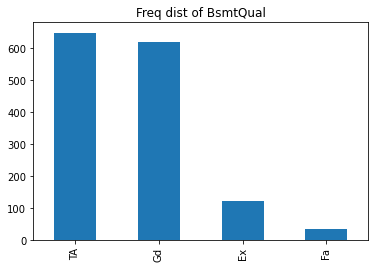

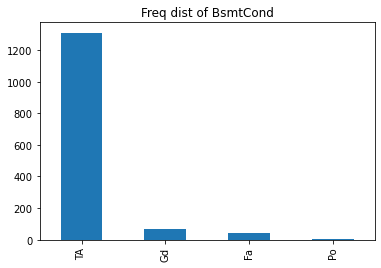

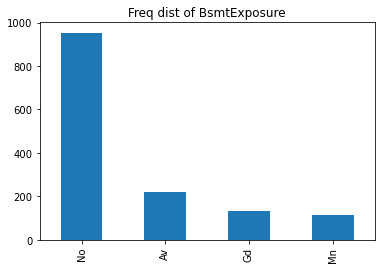

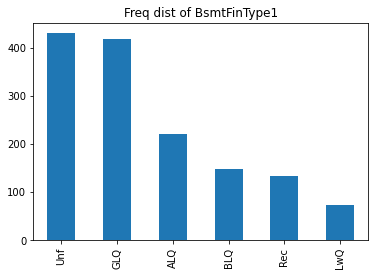

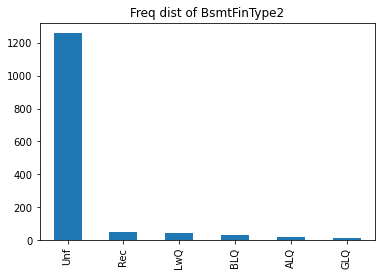

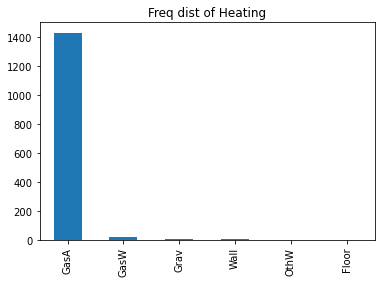

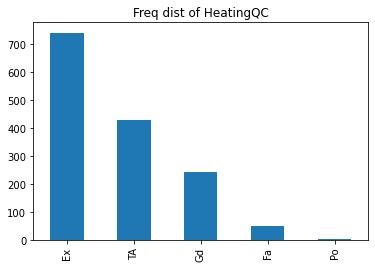

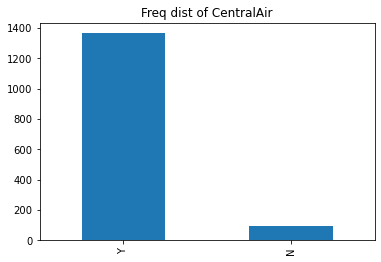

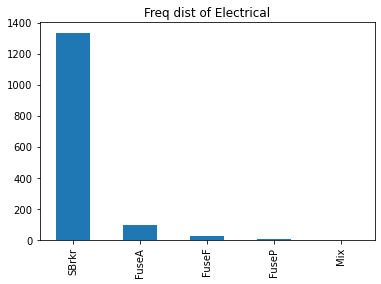

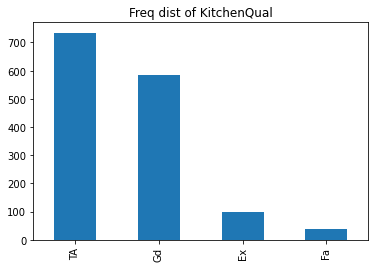

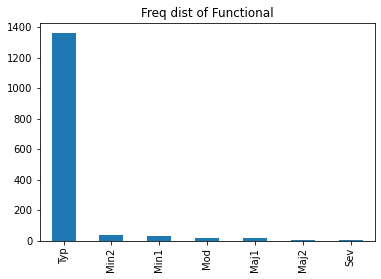

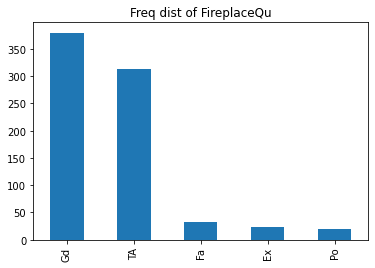

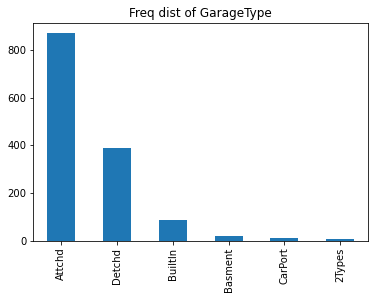

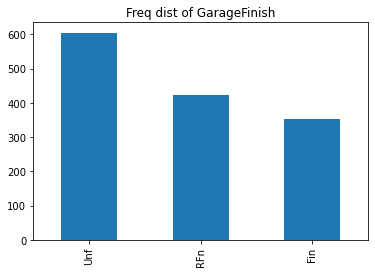

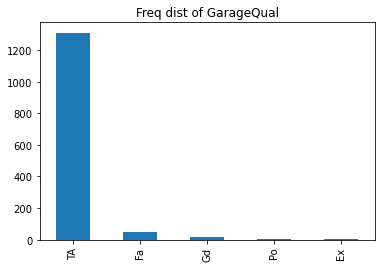

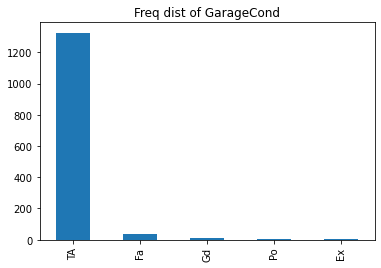

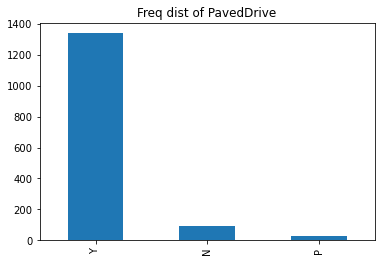

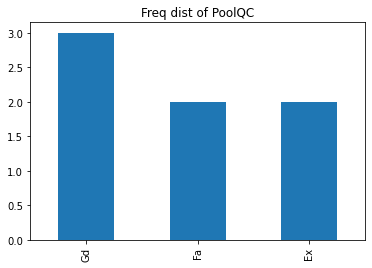

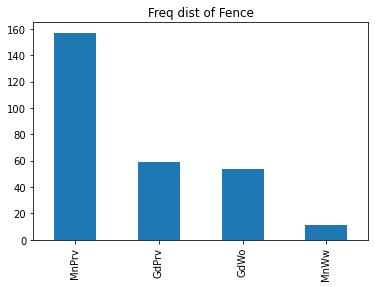

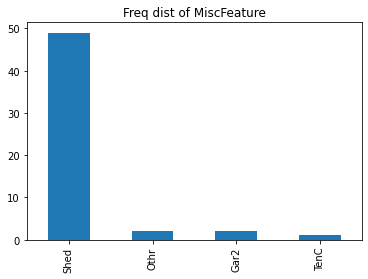

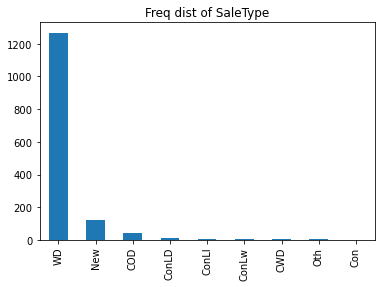

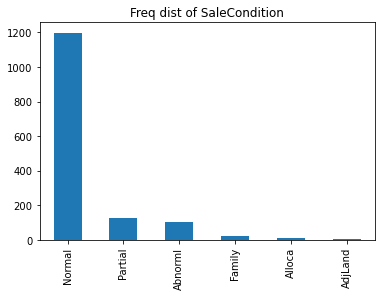

'\nNotes:\n- MSZoning: ~1200 concentrated in RL\n- Street: pretty much all Pave. Consider removing.\n- Alley: fairly well distributed, however, too many null values. Consider removing.\n- LotShape: fairly well distributed.\n- LandContour: ~1300 Lvl. Consider removing.\n- Utilities: 1400+ AllPub. Consider removing.\n- LotConfig: fairly well distributed.\n- LandSlope: ~1400 Gtl. Consider removing.\n- Neighborhood: fairly well distributed.\n- Condition1: ~1300 Norm. Consider removing.\n- Condition2: 1400+ Norm. Consider removing.\n- BldgType: ~1200 1fam.\n- HouseStyle: fairly well distributed.\n- RoofStyle: fairly well distributed.\n- RoofMatl: 1400+ CompShg.\n- Exterior1st: fairly well distributed.\n- Exteroir2nd: fairly well distributed.\n- MasVnrType: fairly well distributed.\n- ExterQual: fairly well distributed.\n- ExterCond: fairly well distributed.\n- Foundation: fairly well distributed.\n- BsmtQual: fairly well distributed.\n- BsmtCond: ~1300 TA.\n- BmstExposure: fairly well distr

In [70]:
# Go through each object features and look at the distributions.
for obj in objcol:
    train[obj].value_counts().plot.bar(title = 'Freq dist of ' + obj)
    plt.show()
    
'''
Notes:
- MSZoning: ~1200 concentrated in RL
- Street: pretty much all Pave. Consider removing.
- Alley: fairly well distributed, however, too many null values. Consider removing.
- LotShape: fairly well distributed.
- LandContour: ~1300 Lvl. Consider removing.
- Utilities: 1400+ AllPub. Consider removing.
- LotConfig: fairly well distributed.
- LandSlope: ~1400 Gtl. Consider removing.
- Neighborhood: fairly well distributed.
- Condition1: ~1300 Norm. Consider removing.
- Condition2: 1400+ Norm. Consider removing.
- BldgType: ~1200 1fam.
- HouseStyle: fairly well distributed.
- RoofStyle: fairly well distributed.
- RoofMatl: 1400+ CompShg.
- Exterior1st: fairly well distributed.
- Exteroir2nd: fairly well distributed.
- MasVnrType: fairly well distributed.
- ExterQual: fairly well distributed.
- ExterCond: fairly well distributed.
- Foundation: fairly well distributed.
- BsmtQual: fairly well distributed.
- BsmtCond: ~1300 TA.
- BmstExposure: fairly well distributed.
- BsmtFinType1: fairly well distributed.
- BsmtFinType2: 1200+ Unf.
- Heating: 1400+ GasA. Consider removing.
- HeatingQC: fairly well distributed.
- CentralAir: ~1400 Y. Maybe remove.
- Electrical: ~1400 SBrkr. Maybe remove.
- KitchenQual: fairly well distributed.
- Functional: ~1400 Typ.
- FireplaceQu: fairly well distributed.
- GarageType: fairly well distributed.
- GarageFinish: fairly well distributed.
- GarageQual: ~1300 TA.
- GarageCond: ~1300 TA.
- PavedDrive: ~1400 Y.
- PoolQC: fairly well distributed.
- Fence: fairly well distributed.
- MiscFeature: fairly well distributed, however, too many null values. Consider removing.
- SaleType: ~1300 WD.
- SaleCondition: ~1200 Normal.

A threshold will be set to remove the variables that have more than 90% of the observation in one value within the variable later.
'''

### Deeper Dive into the Important Features

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

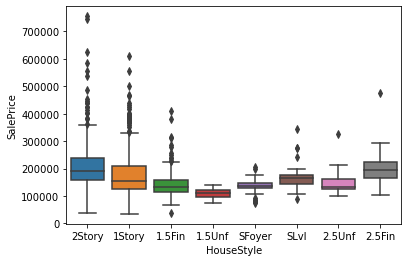

In [71]:
# House Style vs. SalePrice
# 2 story seems to be priced higher, then 1 story. Other ones are scarce.
sns.boxplot(x = train['HouseStyle'], y = train['SalePrice'])

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

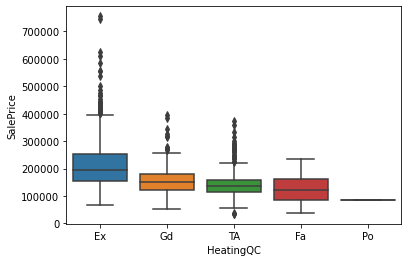

In [72]:
# HeatingQC vs. SalePrice
# Excellent heating quality is higher priced, as expected.
sns.boxplot(x = train['HeatingQC'], y = train['SalePrice'])

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

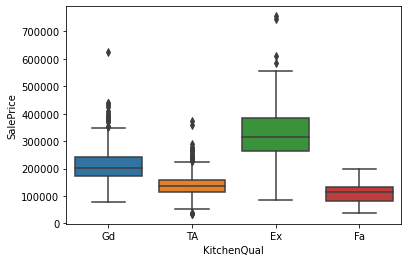

In [73]:
# KitchenQual vs. SalePrice
# Excellent kitchen quality is higher priced, as expected.
sns.boxplot(x = train['KitchenQual'], y = train['SalePrice'])

<AxesSubplot:title={'center':'Freq dist of MSSubClass'}>

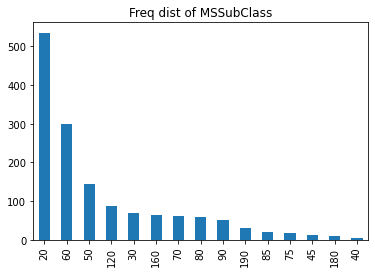

In [74]:
# MSSubClass has an integer type, but is an object feature. So same views will be done on the feature as well.
# Top 3 types of dwelling are: 1-story 1946 & newer all styles, 2-story 1946 & newer, and 1-1/2 story finished all ages.
train['MSSubClass'].value_counts().plot.bar(title = 'Freq dist of MSSubClass')

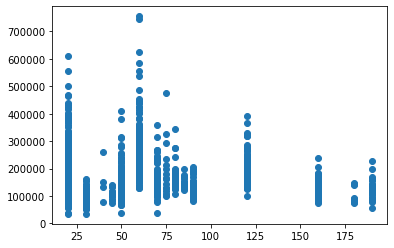

In [75]:
# MSSubClass vs. SalePrice
# 2-story 1946 & newer seems to have the highest end of the sale price.
plt.scatter(train['MSSubClass'],train['SalePrice'])

### Remove Outliers

In [76]:
# Before looking for outliers, 'TotalSF' feature will be created.
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

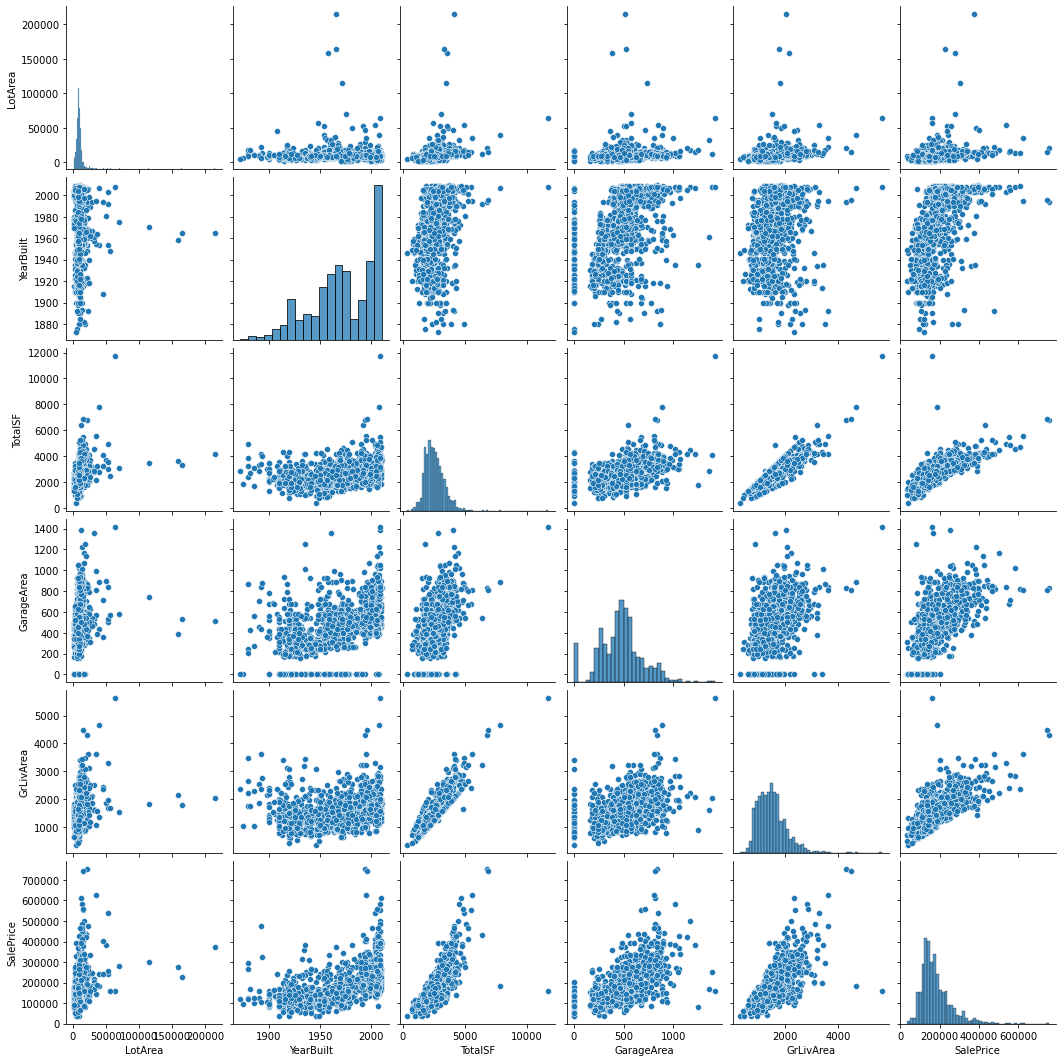

In [77]:
# Look at the pairplot of the important features along with SalePrice
sns.pairplot(data = train[['LotArea', 'YearBuilt', 'TotalSF', 'GarageArea', 'GrLivArea', 'SalePrice']])

In [78]:
# Remove outliers where LotArea is greater than 100,000 and TotalSF is greater than 7000.
train.drop(train.index[train['LotArea'] > 1e5], axis = 0, inplace = True)
train.drop(train.index[train['TotalSF'] > 7000], axis = 0, inplace = True)

In [79]:
# 6 observations dropped due to outlier removal.
train.shape

(1454, 81)

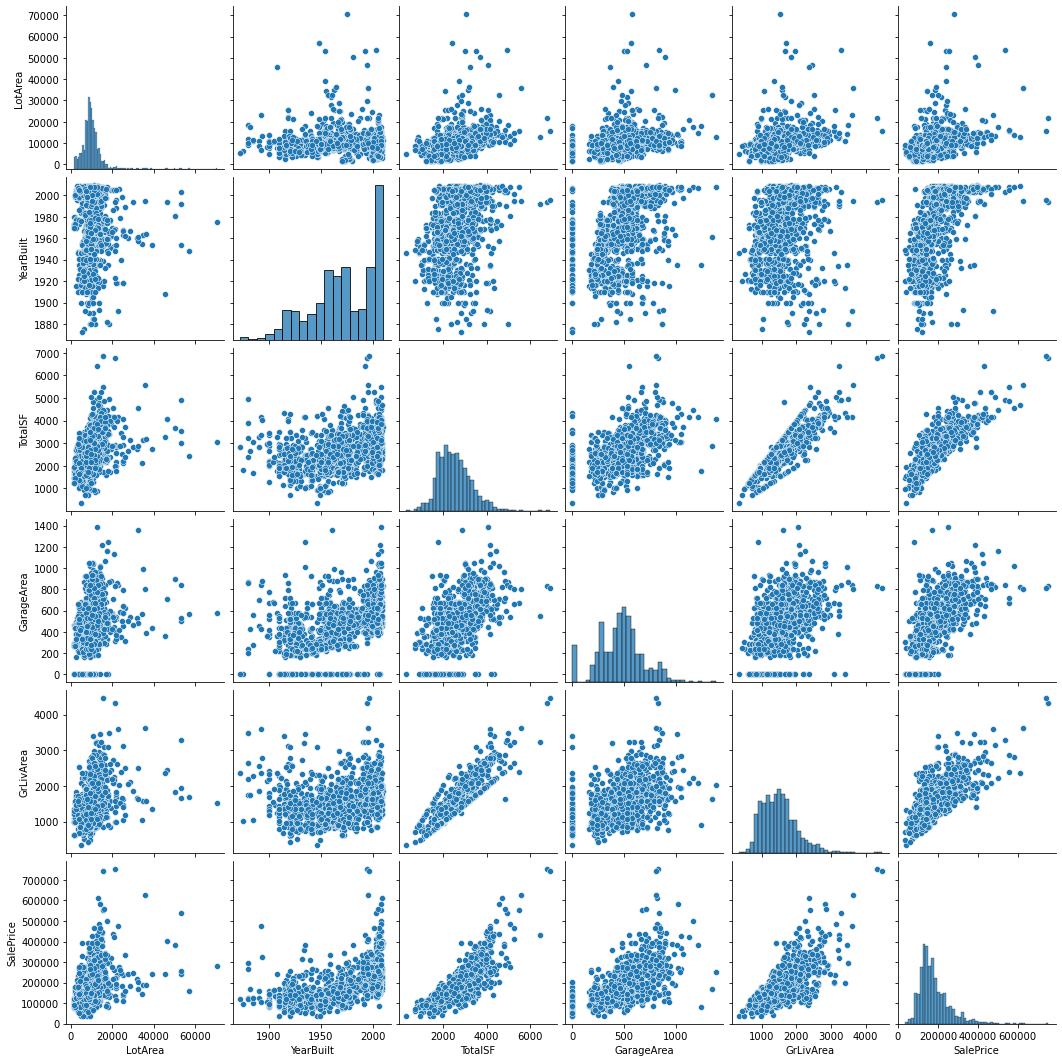

In [80]:
# Look at the pairplot of the important features along with SalePrice again to look if it looks more reasonable without outliers.
sns.pairplot(data = train[['LotArea', 'YearBuilt', 'TotalSF', 'GarageArea', 'GrLivArea', 'SalePrice']])

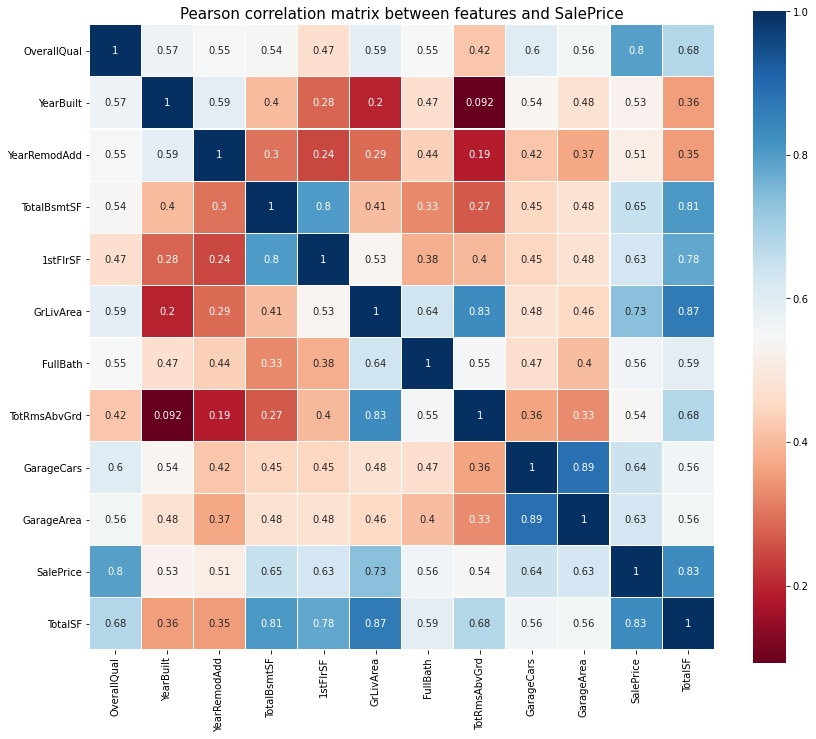

In [81]:
# Look at correlation matrix vs. SalePrice to see if there are any unexpected correlations that stand out.
# All of the high correlations made sense.
corr_train = train.corr()
highest_corr_features = corr_train.index[abs(corr_train['SalePrice']) > 0.5]

plt.figure(figsize = (14,12))
plt.title('Pearson correlation matrix between features and SalePrice', y = 1, size = 15)
sns.heatmap(train[highest_corr_features].corr(),
           linewidths = 0.1,
           vmax = 1.0,
           square = True,
           cmap = 'RdBu',
           linecolor = 'white',
           annot = True)
plt.show()

### Check for Null Values

In [82]:
# Look at null values in descending order of counts.
train.isnull().sum().sort_values(ascending = False)

PoolQC           1448
MiscFeature      1402
Alley            1363
Fence            1173
FireplaceQu       690
LotFrontage       256
GarageYrBlt        81
GarageQual         81
GarageFinish       81
GarageCond         81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrType          8
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
BsmtFullBath        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
BsmtHalfBath        0
CentralAir

In [83]:
# Look at the value distribution of the PoolQC feature.
# Very sparse - many null values which means no pools.
train['PoolQC'].value_counts()

Fa    2
Gd    2
Ex    2
Name: PoolQC, dtype: int64

(array([1.448e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

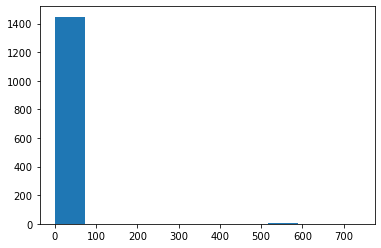

In [84]:
# Most houses (except 7) all do not have pools. This will be caught in feature selection logic later.
plt.hist(train.loc[:,'PoolArea'])

In [85]:
# Look at the value distribution of the MiscFeature feature.
# Also very sparse - only 53 observations have values populated. This will be caught in feature selection logic later.
train['MiscFeature'].value_counts()

Shed    47
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [86]:
# Look at the value distribution of the Alley feature.
# Also very sparse - only 91 observations have values populated. This will be caught in feature selection logic later.
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [87]:
# Look at the value distribution of the Fence feature.
# However, this will not be caught by the feature selection logic later. Nulls (no fence) will have to be manually encoded to 0.
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [88]:
# Look at the value distribution of the Alley feature.
# While this one is sparse, there are many observations populated. Ordinal encoding will be used.
train['FireplaceQu'].value_counts()

Gd    376
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

## Feature Selection

In [89]:
# Look at features that have more than 90% of the observations as null.
NullThreshold = 0.9
drop_null = list()
for col in train.columns:
    if train[col].isnull().sum(axis = 0) / train.shape[0] > NullThreshold:
        drop_null.append(col)

print(f'Features that have more than 40% of observation as null: {drop_null}')

Features that have more than 40% of observation as null: ['Alley', 'PoolQC', 'MiscFeature']


In [90]:
# This logic catches 3 features. Deeper look at those features.
train['PoolQC'].value_counts()

Fa    2
Gd    2
Ex    2
Name: PoolQC, dtype: int64

In [91]:
'''
Notes:
- Alley seems to have 94% null and won't provide much value. Will remove.
- PoolQC seems to be almost entirely null. PoolArea will catch whether the property has a pool or not, so will remove.
- MiscFeature seems have 96% null and won't provide much value. Will remove.
'''

"\nNotes:\n- Alley seems to have 94% null and won't provide much value. Will remove.\n- PoolQC seems to be almost entirely null. PoolArea will catch whether the property has a pool or not, so will remove.\n- MiscFeature seems have 96% null and won't provide much value. Will remove.\n"

In [92]:
objcol.append('MSSubClass')
objcol

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [93]:
# Look at categorical features that have more than 90%  of the observations in one value.
# This will catch features that has too many null values as well.
MajorityThreshold = 0.9
drop_maj = list()
for obj in objcol:
    if(train[obj].value_counts().max() / train[obj].value_counts().sum()) > MajorityThreshold:
        drop_maj.append(obj)
    
print(f'Features that have more than 90% of the observations in one value: {drop_maj}')

Features that have more than 90% of the observations in one value: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature']


In [94]:
# This logic catches 15 features. Deeper look at those features.
# Since we will most likely use tree based models, having more features won't be a problem. Will attempt to save some features.
train['Street'].value_counts()

Pave    1449
Grvl       5
Name: Street, dtype: int64

In [95]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [96]:
'''
Notes on the dropped features:
- Street: Essentially all 'Pave'. Will Remove.
- LandContour: 90% in 'Lvl', but there is a good amount of other values, so will keep.
- Utilities: Essentially all 'AllPub'. Will Remove.
- LandSlope: 95% in 'Gtl', but there is a good amount of other values, so will keep.
- Condition2: Essentially all 'Norm'. Will Remove.
- RoofMatl: Essentially all 'CompShg'. Will Remove.
- BsmtCond: 90% in 'TA', however, this can be mapped using ordinal encoding and use 0 for properties with no basement. Will keep.
- Heating: 98% in 'GasA'. Since HeatingQC feature can handle the properties with no heating, will remove.
- CentralAir: 93% in 'Y', but since everything is populated, will keep.
- Electrical: 91% in 'SBrkr', but there is a good amount of other values, so will keep.
- Functional: 93% in 'Typ', but there is a good amount of other values, so will keep.
- GarageQual: Ordinal encoding, so will keep.
- GarageCond: Ordinal encoding, so will keep.
- PavedDrive: 92% 'Y', but will keep.
- MiscFeature: Very sparse definition with 96% null, so will remove.
'''

"\nNotes on the dropped features:\n- Street: Essentially all 'Pave'. Will Remove.\n- LandContour: 90% in 'Lvl', but there is a good amount of other values, so will keep.\n- Utilities: Essentially all 'AllPub'. Will Remove.\n- LandSlope: 95% in 'Gtl', but there is a good amount of other values, so will keep.\n- Condition2: Essentially all 'Norm'. Will Remove.\n- RoofMatl: Essentially all 'CompShg'. Will Remove.\n- BsmtCond: 90% in 'TA', however, this can be mapped using ordinal encoding and use 0 for properties with no basement. Will keep.\n- Heating: 98% in 'GasA'. Since HeatingQC feature can handle the properties with no heating, will remove.\n- CentralAir: 93% in 'Y', but since everything is populated, will keep.\n- Electrical: 91% in 'SBrkr', but there is a good amount of other values, so will keep.\n- Functional: 93% in 'Typ', but there is a good amount of other values, so will keep.\n- GarageQual: Ordinal encoding, so will keep.\n- GarageCond: Ordinal encoding, so will keep.\n- Pa

In [97]:
# This list aggregates the notes from null and majority threshold above.
drop_list = ['Alley', 'PoolQC', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature']

In [98]:
# Drop the fields from the data
train.drop(drop_list, axis = 1, inplace = True)

In [99]:
# Check the shape of the data frame at this point.
train.shape

(1454, 73)

## Feature Engineering
Impute Missing Values
- For categorical features, mode within the neighborhood will be used.
- For numerical features, mean within the neighborhood will be used.

Encoding Categorical Features
- Ordinal categorical features will use ordinal encoder (manual).
- Non-ordinal categorical features will use target encoding.

More New Features After Encoding
- SqftAbvGrd: 1stFlrSF + 2ndFlrSF
- SqftPerRoom: TotalSF/TotRmsAbvGrd
- SqftAbvGrdPerRoom: SqftAbvGrd/TotRmsAbvGrd
- TotalBath = FullBath + 1/2 * HalfBath
- GarageQC: GarageQual + GarageCond
- ExterQC: ExterQual + ExterCond
- BsmtQC: BsmtQual + BsmtCond
- OveralQC = OverallQual + OverallCond

### Impute Missing Values

In [100]:
# Look at what features have nulls.
# Numerical: LotFrontage, MasVnrArea, GarageYrBlt (but GarageYrBlt will be handled like a categorical)
# Categorical: MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu,
# GarageType, GarageFinish, GarageQual, GarageCond, Fence
train.columns[train.isna().sum()>0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence'],
      dtype='object')

In [101]:
'''
Notes:
- MasVnrType: there are 862 'None', but there are 8 'NaN' that needs to be imputed.
- BsmtQual: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.
- BsmtCond: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.
- BsmtExposure: there are 38 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.
- BsmtFinType1: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.
- BsmtFinType2: there are 38 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.
- Electrical: there is 1 'NaN' that needs to be imputed.
- FireplaceQu: there are 690 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no fireplace.
- GarageType: there are 81 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no garage.
- GarageFinish: there are 81 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no garage.
- GarageQual: there are 81 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no garage.
- GarageCond: there are 81 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no garage.
- Fence: there are 1173 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no fence.
'''

"\nNotes:\n- MasVnrType: there are 862 'None', but there are 8 'NaN' that needs to be imputed.\n- BsmtQual: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.\n- BsmtCond: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.\n- BsmtExposure: there are 38 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.\n- BsmtFinType1: there are 37 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.\n- BsmtFinType2: there are 38 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no basement.\n- Electrical: there is 1 'NaN' that needs to be imputed.\n- FireplaceQu: there are 690 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no fireplace.\n- GarageType: there are 81 'NaN' that needs to be imputed. These will just need to be mapped to 'None' for no garag

In [102]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     26
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [103]:
# Due to the notes above where most of 'NaN' actually means 'None', those feature nulls will be relabeled.
na_fix_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']

for att in na_fix_list:
    train[att].fillna('None', inplace = True)

In [104]:
# Look at the distribution of the features by neighborhood to see if it makes sense to use the mean (b/c of outliers)
impute_list = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MasVnrType', 'Electrical']

def plotdist(df):
    lst_neighborhood = df['Neighborhood'].unique()
    for i in lst_neighborhood:
        yield plt.title(f'Neighborhood: {i}')
        yield plt.hist(df.loc[df['Neighborhood'] == i, 'LotFrontage'])

x = plotdist(train)

Text(0.5, 1.0, 'Neighborhood: CollgCr')

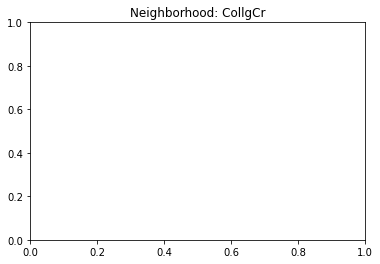

In [105]:
# Checked all neighborhoods for LotFrontage, MasVnrArea, GarageYrBlt, MasVnrType, and Electrical.
# There are a few outliers, but nothing that concerns me from using the mean/mode as imputation for the features.
next(x)

In [106]:
# The three numerical features along with MasVnrType and Electrical will be be imputed by mean/mode by neighborhood.
train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].transform('mean'))
train['MasVnrArea'] = train['MasVnrArea'].fillna(train.groupby('Neighborhood')['MasVnrArea'].transform('mean'))
train['GarageYrBlt'] = train.groupby('Neighborhood')['GarageYrBlt'].apply(lambda x: x.fillna(x.mode().iloc[0]))
train['MasVnrType'] = train.groupby('Neighborhood')['MasVnrType'].apply(lambda x: x.fillna(x.mode().iloc[0]))
train['Electrical'] = train.groupby('Neighborhood')['Electrical'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [107]:
# Check to see if all null values are gone from the data.
total_missing = train.isnull().sum().sum()
print(f'Total number of nulls: {total_missing}')

Total number of nulls: 0


### Encoding Categorical Features

In [108]:
# Look at the data types before encoding.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1454 non-null   int64  
 1   MSZoning       1454 non-null   object 
 2   LotFrontage    1454 non-null   float64
 3   LotArea        1454 non-null   int64  
 4   LotShape       1454 non-null   object 
 5   LandContour    1454 non-null   object 
 6   LotConfig      1454 non-null   object 
 7   LandSlope      1454 non-null   object 
 8   Neighborhood   1454 non-null   object 
 9   Condition1     1454 non-null   object 
 10  BldgType       1454 non-null   object 
 11  HouseStyle     1454 non-null   object 
 12  OverallQual    1454 non-null   int64  
 13  OverallCond    1454 non-null   int64  
 14  YearBuilt      1454 non-null   int64  
 15  YearRemodAdd   1454 non-null   int64  
 16  RoofStyle      1454 non-null   object 
 17  Exterior1st    1454 non-null   object 
 18  Exterior

In [109]:
# Divide features into ordinal, non-ordinal, and numerical.
ordinal_att = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
              'GarageCond']

nonordinal_att = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
                 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'Functional', 'GarageType', 
                 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

numerical_att = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF']

In [110]:
# Check that all features are accounted for in the three groupings.
features = ordinal_att + nonordinal_att + numerical_att
assert len(features) - len(train.drop('SalePrice', axis = 1).columns) == 0

In [111]:
# Encode ordinal features
train['LotShape'] = train['LotShape'].replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
train['LandSlope'] = train['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3})
train['ExterQual'] = train['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['ExterCond'] = train['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['BsmtQual'] = train['BsmtQual'].replace({'None': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['BsmtCond'] = train['BsmtCond'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['BsmtExposure'] = train['BsmtExposure'].replace({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd': 4})
train['BsmtFinType1'] = train['BsmtFinType1'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
train['BsmtFinType2'] = train['BsmtFinType2'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
train['CentralAir'] = train['CentralAir'].replace({'N':0, 'Y':1})
train['KitchenQual'] = train['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['FireplaceQu'] = train['FireplaceQu'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['GarageFinish'] = train['GarageFinish'].replace({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
train['GarageQual'] = train['GarageQual'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})
train['GarageCond'] = train['GarageCond'].replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex': 5})

In [112]:
# Encode non-ordinal features
labelencoder = LabelEncoder()
for obj in nonordinal_att:
    train[obj] = labelencoder.fit_transform(train[obj].astype(str))

In [113]:
# Look at the data types after encoding. Confirm all data types are now other int or float.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1454 non-null   int32  
 1   MSZoning       1454 non-null   int32  
 2   LotFrontage    1454 non-null   float64
 3   LotArea        1454 non-null   int64  
 4   LotShape       1454 non-null   int64  
 5   LandContour    1454 non-null   int32  
 6   LotConfig      1454 non-null   int32  
 7   LandSlope      1454 non-null   int64  
 8   Neighborhood   1454 non-null   int32  
 9   Condition1     1454 non-null   int32  
 10  BldgType       1454 non-null   int32  
 11  HouseStyle     1454 non-null   int32  
 12  OverallQual    1454 non-null   int64  
 13  OverallCond    1454 non-null   int64  
 14  YearBuilt      1454 non-null   int64  
 15  YearRemodAdd   1454 non-null   int64  
 16  RoofStyle      1454 non-null   int32  
 17  Exterior1st    1454 non-null   int32  
 18  Exterior

### More New Features After Encoding

In [114]:
# Add new features
train['SqftAbvGrd'] = train['1stFlrSF'] + train['2ndFlrSF']
train['TotalSqftPerRoom'] = train['TotalSF']/train['TotRmsAbvGrd']
train['SqftAbvGrdPerRoom'] = train['SqftAbvGrd']/train['TotRmsAbvGrd']
train['TotalBath'] = train['FullBath'] + (0.5 * train['HalfBath']) 
train['GarageQC'] = train['GarageQual'] + train['GarageCond']
train['ExterQC'] = train['ExterQual'] + train['ExterCond']
train['BsmtQC'] = train['BsmtQual'] + train['BsmtCond']
train['OverallQC'] = train['OverallQual'] + train['OverallCond']

In [115]:
# Create a list of features
total_features = list(train.columns)
total_features.remove('SalePrice')
len(total_features)

80

In [122]:
total_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal

In [116]:
# Transform SalePrice to log SalePrice
# train['logSalePrice'] = np.log(train['SalePrice'])
# train.drop('SalePrice', axis = 1, inplace = True)

In [117]:
x_train = train.drop('SalePrice', axis = 1).to_numpy()
y_train = train['SalePrice'].copy().to_numpy()

## Model
The goal is to find a model that minimizes RMSE, where the target is log of SalePrice. The following models were tested:
- Random Forest Regression
- Gradient Boosting Regression
- Light Gradient Boosting Machine (LGBM) Regression
- Extreme Gradient Boosting (XGB) Regression

### RMSE Helper Functions

In [119]:
# RMSE Scorer
def get_rmse(y_actual, y_predict):
    log_y_actual = np.log(y_actual)
    log_y_predict = np.log(y_predict)
    mse = mean_squared_error(log_y_actual, loy_y_predict)
    rmse = np.sqrt(mse)
    return rmse

# Initialize RMSE Scorer
rmse_scorer = make_scorer(get_rmse, greater_is_better = False)

# Random State Generator
rng = np.random.RandomState(42)

# K-Fold Cross-Validation RMSE
kfolds = KFold(n_splits = 5, shuffle = True, random_state = rng)
def cv_rmse(model, x, y):
    cv_rmse = -cross_val_score(model, x, y, n_jobs = 30, scoring = rmse_scorer, cv = kfolds)
    return cv_rmse

### Random Forest

In [120]:
# Random Forest Refressor Function
def RFR_fn(params):
    
    params = {'n_estimators': int(params['n_estimators']),
             'max_depth': int(params['max_depth']),
             'min_samples_leaf': int(params['min_samples_leaf']),
             'max_features': int(params['max_features'])}
    
    model = RandomForestRegressor(random_state = rng, **params, n_jobs = 30)
    
    rmse_score = np.mean(cv_rmse(model, x_train, y_train))
    
    return rmse_score

In [121]:
# Hyperparameter Tuning for Random Forest
space = {'n_estimators': hp.quniform('n_estimators', low = 1000, high = 4000, q = 250),
        'max_depth': hp.quniform('max_depth', low = 3, high = 10, q = 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', low = 5, high = 20, q = 1),
        'max_features': hp.quniform('max_features', low = 4, high = 9, q = 1),
        'max_samples': hp.uniform('max_samples', low = 0.5, high = 0.8)}

trials = Trials()
RFR_best_params = fmin(fn = RFR_fn,
                      space = space,
                      algo = tpe.suggest,
                      max_evals = 25*5,
                      trials = trials,
                      rstate = rng)

param_list = ['n_estimators',
             'max_depth',
             'min_samples_leaf',
             'max_features']

for param in param_list:
    RFR_best_params[param] = int(RFR_best_params[param])
    
pickle.dump(RFR_best_params, open('../output/RFR.pkl', 'wb'))
RFR_best_params

100%|██████████| 125/125 [00:20<00:00,  6.14trial/s, best loss=?]


AllTrialsFailed: 

In [ ]:
# Final Score
RFR_best_params = pickle.load(open('../output/RFR.pkl', 'rb'))
RFR_fn(RFR_best_params)

In [ ]:
# Fit RFR Best
RFR_best = RandomForestRegressor(random_state = rng, **RFR_best_params)
RFR_best.fit(x_train, y_train)

#